In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from dcgan.model import GanModel
from keras.datasets import mnist
import math
%matplotlib inline

def combine_images(generated_images):
    num = generated_images.shape[0]
    width = int(math.sqrt(num))
    height = int(math.ceil(float(num)/width))
    shape = generated_images.shape[1:]
    image = np.zeros((height*shape[0], width*shape[1]),
                     dtype=generated_images.dtype)
    for index, img in enumerate(generated_images):
        i = int(index/width)
        j = index % width
        image[i*shape[0]:(i+1)*shape[0], j*shape[1]:(j+1)*shape[1]] = img
        
    return image

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = np.expand_dims(X_train, -1)

gan = GanModel(lr=2e-3)

Using TensorFlow backend.


In [10]:
gan.train((X_train, y_train), (X_test, y_test), epochs=100)
plt.plot(gan.d_loss)
plt.show()
plt.plot(gan.g_loss)
plt.show()

Batches per epoch : 468
Epoch : 0001/0100
0001/0468 gen loss: 1.00112 - disc loss: 0.16268


KeyboardInterrupt: 

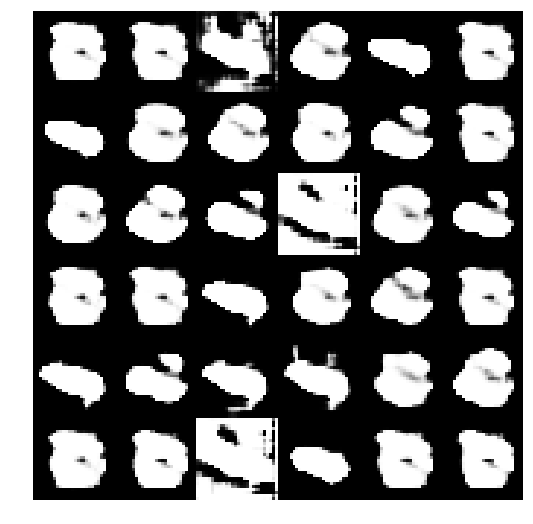

In [9]:
test = gan.generate(36, 0)
test = test.reshape([-1,28,28])
plt.figure(figsize=(9,9))
plt.imshow(combine_images(test), 'gray')
plt.axis('off')
plt.show()